# Social Network Analysis

In this final case study, we use the NetworkX module to manipulate network graphs, determine degrees of nodes, and find connected paths and statistics of network properties. 

In [10]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1, 2, 3])
G.add_nodes_from(["u", "v"])
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [11]:
G.add_edge(1,2)
G.add_edges_from([("u", "v"), (1,3), (1,4), (1,5)])
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), ('u', 'v')])

In [12]:
G.remove_node(4)
G.nodes()

NodeView((1, 2, 3, 'u', 'v', 5))

In [13]:
print(G.number_of_nodes())
print(G.number_of_edges())

6
4


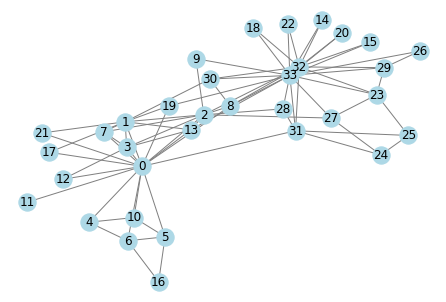

In [15]:
# use sample dataset and plot
import matplotlib.pyplot as plt
G = nx.karate_club_graph()
nx.draw(G, with_labels = True, node_color = "lightblue", edge_color = "gray")
plt.show()

In [18]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [25]:
G.degree(33) is G.degree()[33]

True

In [29]:
print(G.number_of_nodes())
print(G.number_of_edges())

34
78


In [49]:
# Generating random graphs- the Erdos-Renyi model
from scipy.stats import bernoulli
def ER(N, p):
    """Creates a random undirected graph with N nodes and probability of an edge between any two nodes p."""
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1, node2)
    return G
G = ER(20, 0.2)
print(G.number_of_nodes())
print(G.number_of_edges())

20
37


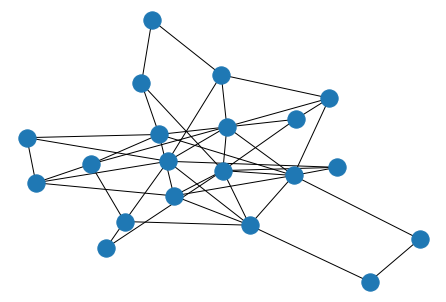

In [33]:
nx.draw(G)

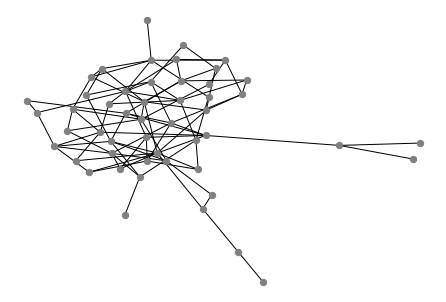

In [36]:
nx.draw(ER(50, 0.08), node_size = 40, node_color = "gray")

In [39]:
# Plotting degree distributions
def plot_degree_distribution(G):
    """Plots the distribution of degrees for all nodes in a graph G."""
    degree_sequence = [d for n,d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree Distribution")

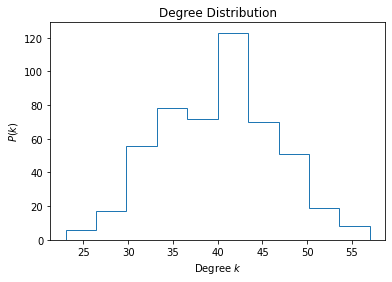

In [44]:
G = ER(500, 0.08)
plot_degree_distribution(G)

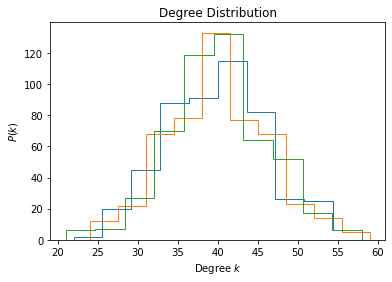

In [50]:
G1 = ER(500, 0.08)
plot_degree_distribution(G1)
G2 = ER(500, 0.08)
plot_degree_distribution(G2)
G3 = ER(500, 0.08)
plot_degree_distribution(G3)

In [54]:
# Social networks in rural villages in India
import numpy as np
A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")
A1

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [55]:
# convert adjacency matrices to graphs
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [57]:
def basic_net_stats(G):
    print("number of nodes: " + str(G.number_of_nodes()))
    print("number of edges: " + str(G.number_of_edges()))
    degree_list = [d for n,d in G.degree()]
    print("mean degree: " + str(np.mean(degree_list)))
basic_net_stats(G1)
basic_net_stats(G2)

number of nodes: 843
number of edges: 3405
mean degree: 8.078291814946619
number of nodes: 877
number of edges: 3063
mean degree: 6.985176738882554


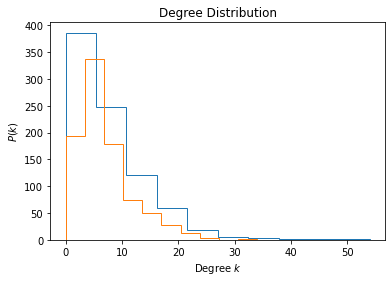

In [59]:
# empirical networks are not accurately captured by ER model
plot_degree_distribution(G1)
plot_degree_distribution(G2)

In [105]:
# Finding and visualizing the largest connected path
# note: this has changed since the making of the video, as the used connected_component_subgraph() method is no longer present
gen = [G1.subgraph(c) for c in nx.connected_components(G1)]
for i in range(len(gen)):
    basic_net_stats(gen[i])
len(gen)

number of nodes: 825
number of edges: 3386
mean degree: 8.208484848484849
number of nodes: 3
number of edges: 3
mean degree: 2.0
number of nodes: 3
number of edges: 3
mean degree: 2.0
number of nodes: 4
number of edges: 6
mean degree: 3.0
number of nodes: 2
number of edges: 1
mean degree: 1.0
number of nodes: 4
number of edges: 6
mean degree: 3.0
number of nodes: 1
number of edges: 0
mean degree: 0.0
number of nodes: 1
number of edges: 0
mean degree: 0.0


8

In [106]:
LCC = max(g.number_of_nodes() for g in gen)
idx = [g.number_of_nodes() == LCC for g in gen]
maxsubgraph_G1 = gen[idx == True]
print(LCC/G1.number_of_nodes())

0.9786476868327402


In [107]:
gen = [G2.subgraph(c) for c in nx.connected_components(G2)]
for i in range(len(gen)):
    basic_net_stats(gen[i])
len(gen)

number of nodes: 810
number of edges: 2924
mean degree: 7.219753086419753
number of nodes: 2
number of edges: 1
mean degree: 1.0
number of nodes: 1
number of edges: 0
mean degree: 0.0
number of nodes: 2
number of edges: 1
mean degree: 1.0
number of nodes: 2
number of edges: 1
mean degree: 1.0
number of nodes: 8
number of edges: 28
mean degree: 7.0
number of nodes: 4
number of edges: 6
mean degree: 3.0
number of nodes: 4
number of edges: 6
mean degree: 3.0
number of nodes: 3
number of edges: 3
mean degree: 2.0
number of nodes: 3
number of edges: 3
mean degree: 2.0
number of nodes: 2
number of edges: 1
mean degree: 1.0
number of nodes: 4
number of edges: 6
mean degree: 3.0
number of nodes: 5
number of edges: 10
mean degree: 4.0
number of nodes: 4
number of edges: 6
mean degree: 3.0
number of nodes: 4
number of edges: 6
mean degree: 3.0
number of nodes: 4
number of edges: 6
mean degree: 3.0
number of nodes: 10
number of edges: 45
mean degree: 9.0
number of nodes: 5
number of edges: 10
mea

18

In [108]:
LCC = max(g.number_of_nodes() for g in gen)
idx = [g.number_of_nodes() == LCC for g in gen]
maxsubgraph_G2 = gen[idx == True]
print(LCC/G2.number_of_nodes())

0.9236031927023945


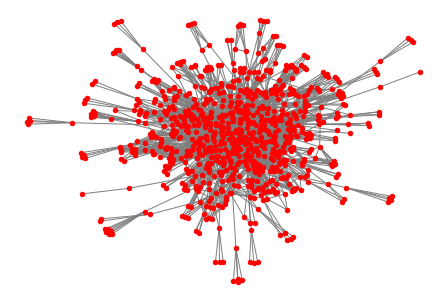

In [109]:
nx.draw(maxsubgraph_G1, node_color="red", edge_color="gray", node_size = 20)

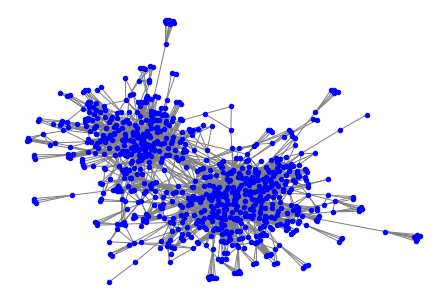

In [111]:
nx.draw(maxsubgraph_G2, node_color="blue", edge_color="gray", node_size = 20)